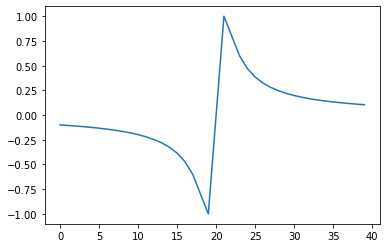

In [ ]:
### this is the unofficial implementation of Jaccard Vector Similarity(JVS)
### Basura Fernando and Samitha Herath, "Anticipating human actions by correlating past with the future with Jaccard similarity measures", CVPR, 2021

import torch
import matplotlib.pyplot as plt

def jaccard_vector_similarity(Z_h, Z_t):
  similarity = (2*(torch.dot(Z_h,Z_t)))/(torch.dot(Z_h,Z_h) + torch.dot(Z_t,Z_t))
  return similarity

vec = torch.rand([512])
k_val = range(-20,20)
sims = []

for k in k_val:
  kvec = k*vec
  sims.append(jaccard_vector_similarity(vec,kvec))

plt.plot(sims)





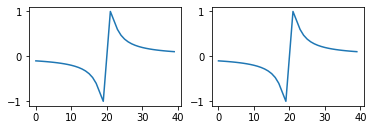

In [14]:
### batch support
import sys 

def bdot(a, b):
    B = a.shape[0]
    S = a.shape[1]
    return torch.bmm(a.view(B, 1, S), b.view(B, S, 1)).reshape(-1)

def jaccard_vector_similarity_batch(Z_h, Z_t):

  b1,d1 = Z_h.shape
  b2,d2 = Z_t.shape

  if b1 != b2 or d1!= d2:
    raise print("Shape or Batch size is not mathed!")
    sys.exit()

  similarity = (2*(bdot(Z_h,Z_t)))/(bdot(Z_h,Z_h) + bdot(Z_t,Z_t))
  return similarity

vec = torch.rand([2,512])
k_val = range(-20,20)
sims1 = []
sims2 = []

for k in k_val:
  kvec = k*vec
  sim = jaccard_vector_similarity_batch(vec,kvec)
  sims1.append(sim[0])
  sims2.append(sim[1])

plt.subplot(221)
plt.plot(sims1)
plt.subplot(222)
plt.plot(sims2)


